Name : Swapnil Ajit Chhatre

Contact No. : 9689642142

Email ID : swapchhatre5@gmail.com / swapnilchhatre10@gmail.com



# Background Study

1. #### About CIFAR10 dataset
2. #### Image Classification Basics
3. #### Deep Learning approaches for Image Classification


### About CIFAR10 Dataset

* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
* There are 50000 training images and 10000 test images.
* The dataset is divided into five training batches and one test batch, each with 10000 images. 
* The test batch contains exactly 1000 randomly-selected images from each class. 
* The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. 
* Between them, the training batches contain exactly 5000 images from each class.
* The classes are completely mutually exclusive.

![picture](https://drive.google.com/uc?export=view&id=1tS2W9Mi78o9lnn7uRwrVtLbL2Pp9karx)



### Image Classification Basics

* Image classification is a supervised learning problem 
* It refers to labelling of images into one of a number of predefined classes.
* Some examples of image classification include
  * Classifying tumor as malignant or benign from X-ray/CT images
  * Classifying handwritten digits
  * Assigning a name to a face in a photograph



---


#### *Steps involved in Image Classification task:*
1. **Image Preprocessing:** Improving image features by suppressing unwanted distortions and enhancements of some important image features so that Computer Vision models can benefit from this improved data to work on.
2. **Detection of an object:** Detection refers to the localization of an object which means the segmentation of the image and identifying the position of the object of interest
3. **Feature extraction and training:** This step involves using statistical and deep learning models to identify the most interesting features or patterns in an image that might be significant to a particular class and will consequently help the model to differentiate between different classes. The process where the model learns the features from the dataset is called model training
4. **Classification of object:** In this step, the detected objects are classified into predefined classes by using suitable classification techniques



## Deep Learning Approaches to Image Classification

#### *Artificial Neural Networks*

* Artificial Neural Networks are statistical learning algorithms and are used for simple classification tasks in Computer Vision
* ANNs are implemented as a system of interconnected processing elements, called nodes, which are functionally analogous to biological neurons.
* The connections between different nodes have numberical values, called weights, and by altering these values in a systematic way, the network is eventually able to approximate the desired function.

![picture](https://drive.google.com/uc?export=view&id=1YpywQacMFmk3xqly269-mTe2nueJFVVX)

* The hidden layers can be thought of as indvidual feature detectors, recognizing more and more complex patterns in the data as it is propagated throughout the network. 
* For example, if the network is given a task to recognize a face, the first hidden layer might act as a line detector, the second hidden takes these lines as input and puts them together to form a nose, the third hidden layer takes the nose and matches it with an eye and so on, until finally the whole face is constructed. This hierarchy enables the network to eventually recognize very complex objects.

#### *Convolutional Neural Networks*

* Convolutional Neural Network  (CNN) is a special architecure of artificial neural networks.
* CNNs uses some of its features of visual cortex and have therefore achieved state of the art results in computer vision tasks
* CNNs are comprised of two very simple elements, convolutional layers and pooling layers
* Majority of computation occurs in the convolutional layer.
* It requires a few components, such as input data, a filter, and a feature map
* The pooling layers, also known as downsampling, conducts dimentionality reduction, reducting the number of parameters in the input.
* In addition to these layers, the CNN model has a fully connected layer
* This layer performs the task of classification based on the features extracted through the previous layers and their different filters

![picture](https://drive.google.com/uc?export=view&id=1PfRaFe6OFLgEYJYN0Q9IpqQM7hchDjNW)

# Convolutional Neural Network Approach 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# Creating a list of all class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()  # Loading the CIFAR 10 dataset 

# Printing the size of training and testing data
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

170508288/170498071 [==============================] - 9s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
# Normalizing the data

trainX = trainX/255.0
trainX.shape

(50000, 32, 32, 3)

In [ ]:
testX = testX/255.0
testX.shape

(10000, 32, 32, 3)

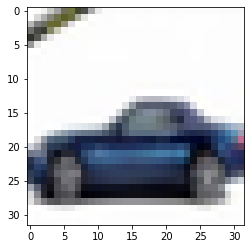

In [ ]:
plt.imshow(testX[105]) # Displaying an image

#### Building a Convolutional Neural Network

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
# First Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))

In [ ]:
# Second Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
# Max Pooling Layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
# Third Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
# Fourth Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
# Max Pooling Layer 
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Flattening Layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Dropout Layer
model.add(tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None))

In [ ]:
# First Fully Connected Layer
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [ ]:
# Output/Second Fully Connected Layer
model.add(tf.keras.layers.Dense(units=10, activation="softmax")) # Units = Number of output classes = 10

In [ ]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
# Training the model
model_hist = model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 17s 4ms/step - loss: 1.3985 - sparse_categorical_accuracy: 0.4923
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9423 - sparse_categorical_accuracy: 0.6688
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7734 - sparse_categorical_accuracy: 0.7284
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6639 - sparse_categorical_accuracy: 0.7670
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5758 - sparse_categorical_accuracy: 0.7955
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5013 - sparse_categorical_accuracy: 0.8218
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4430 - sparse_categorical_accuracy: 0.8409
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3905 - sparse_categorical_accuracy: 0.8612
Epoch 9/15
1563/1563 [=========

In [ ]:
test_loss, test_accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 1.0732 - sparse_categorical_accuracy: 0.7525


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7524999976158142


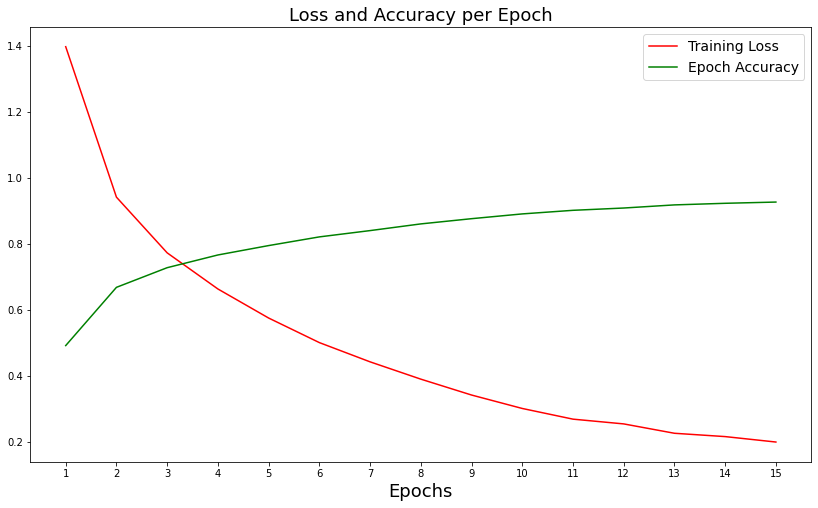

In [ ]:
# Plotting a Loss and Accuracy vs Epochs graph for Training Data

loss_train = model_hist.history['loss']
epoch_acc = model_hist.history['sparse_categorical_accuracy']
epochs = range(1, 16)

plt.figure(figsize=(14, 8))
plt.plot(epochs, loss_train, 'r', label="Training Loss")
plt.plot(epochs, epoch_acc, 'g', label="Epoch Accuracy")
plt.title('Loss and Accuracy per Epoch', size=18)
plt.xlabel('Epochs', size=18)
plt.xticks(epochs)
plt.legend(fontsize=14)
plt.show()

### Section Conclusion
* I have successfully built, trained, and tested a Convolutional Neural Network for classifying the images of CIFAR10 dataset
* The CNN model consists of four convolutional layers, two max pooling layers, one flattening layer, one 20% dropout layer, one fully connected dense layer with 128 neurons, and the final output (dense layer) with 10 output classes
* The model achieved **92.74%** sparse categorical accuracy on the training data and **75.25%** sparse categorical accuracy on the testing data
* The model also achieved minimum loss of **1.9%** on training data and **10.7%** on the tesing data



The proposed CNN model is as follows

![picture](https://drive.google.com/uc?export=view&id=1yi3JG7Eo_ybmsMsCor1chMn8qXbh2lhS)

# AlexNet Approach

#### Background Study

* AlexNet is a leading pre-trained model in Computer Vision
* Alexnet won the Imagenet large-scale visual recognition challenge in 2012. 
* The model was proposed in 2012 in the research paper named Imagenet Classification with Deep Convolution Neural Network by Alex Krizhevsky and his colleagues.
* The AlexNet has eight layers with learnable parameters.
* The model consists of five layers with a combination of max pooling followed by three fully connected layers and they use ReLU activation in each of these layers except the output layer.
* It was observed that using ReLU as an activation function accelerated the speed of the training process by almost six times.
* Dropout layers were also used to prevent the model from overfitting.
* The model was originally trained on the ImageNet dataset which consists of millions of images across thousands of classes



#### AlexNet Architecure




![picture](https://drive.google.com/uc?export=view&id=1sJ1nXTmXtZ7XDyGb_4BnV6-txNR8zm-1)
![picture](https://drive.google.com/uc?export=view&id=1dzMQO0IrkE27j7BqbpAqf-0ntQCQ8p_H)
![picture](https://drive.google.com/uc?export=view&id=1Ltifgh0YuciedSHbtaQgpyWWe2ldFcFy)




#### AlexNet Implementation

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [48]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [49]:
(trainX, trainY), (testX, testY) = cifar10.load_data()  # Loading the CIFAR 10 dataset 

# Printing the size of training and testing data
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [50]:
trainX = trainX/255.0
trainX.shape

(50000, 32, 32, 3)

In [51]:
testX = testX/255.0
testX.shape

(10000, 32, 32, 3)

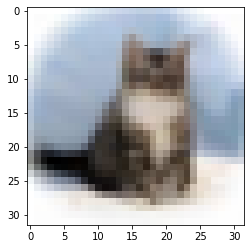

In [52]:
plt.imshow(trainX[207])

In [53]:
alex_model = tf.keras.models.Sequential()

In [54]:
# First Convolutional Layer
alex_model.add(tf.keras.layers.Conv2D(filters=128, input_shape=[32,32,3], kernel_size=11, strides=4, padding="same", activation="relu"))

In [55]:
# Max Pooling Layer
alex_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same"))

In [56]:
# Second Convolutional Layer
alex_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides=1, padding="same", activation="relu"))

In [57]:
# Max Pooling Layer
alex_model.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))

In [58]:
# Third Convolutional Layer
alex_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", padding="same"))

In [59]:
# Fourth Convolutional Layer
alex_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=1, strides=1, activation="relu", padding="same"))

In [60]:
# Fifth Convolutional Layer
alex_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, strides=1, activation="relu", padding="same"))

In [61]:
# Max Pooling Layer
alex_model.add(tf.keras.layers.MaxPool2D(pool_size=1, strides=1))

In [62]:
# Flattening Layer
alex_model.add(tf.keras.layers.Flatten())

In [63]:
# Fully Connected Layer
alex_model.add(tf.keras.layers.Dense(1024, activation="relu"))

In [64]:
# Dropout Layer
alex_model.add(tf.keras.layers.Dropout(0.5))

In [65]:
# Fully Connected Layer
alex_model.add(tf.keras.layers.Dense(1024, activation="relu"))

In [66]:
# Dropout Layer
alex_model.add(tf.keras.layers.Dropout(0.5))

In [67]:
# Output Layer
alex_model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [68]:
# Compiling Model
alex_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='SGD',
                   metrics=['accuracy'])

In [69]:
alex_model_hist = alex_model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 31s 15ms/step - loss: 2.2338 - accuracy: 0.1485
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9799 - accuracy: 0.2501
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7551 - accuracy: 0.3457
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5794 - accuracy: 0.4178
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4649 - accuracy: 0.4653
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3701 - accuracy: 0.5045
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2944 - accuracy: 0.5322
Epoch 8/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2175 - accuracy: 0.5605
Epoch 9/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1563 - accuracy: 0.5874
Epoch 10/15
1563/1563 [==============================] - 23s 15m

In [70]:
test_loss, test_accuracy = alex_model.evaluate(testX, testY)

313/313 [==============================] - 3s 8ms/step - loss: 1.2805 - accuracy: 0.5724


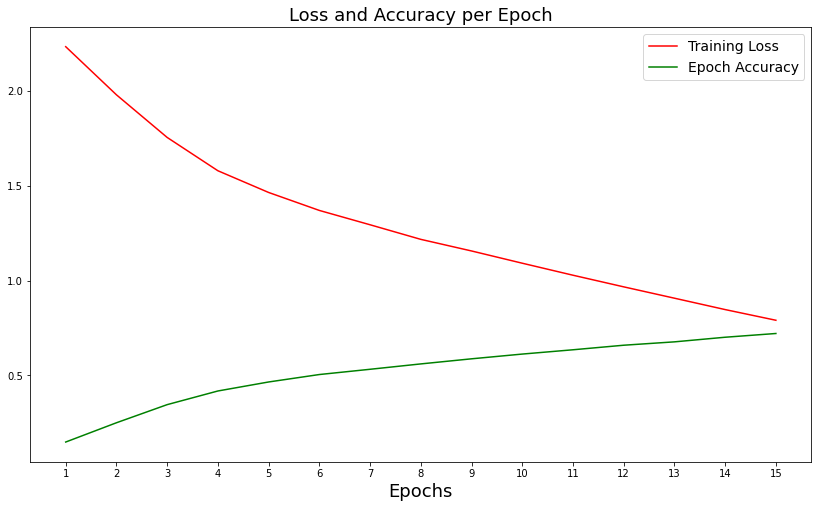

In [71]:
# Plotting a Loss and Accuracy vs Epochs graph for Training Data

loss_train = alex_model_hist.history['loss']
epoch_acc = alex_model_hist.history['accuracy']
epochs = range(1, 16)

plt.figure(figsize=(14, 8))
plt.plot(epochs, loss_train, 'r', label="Training Loss")
plt.plot(epochs, epoch_acc, 'g', label="Epoch Accuracy")
plt.title('Loss and Accuracy per Epoch', size=18)
plt.xlabel('Epochs', size=18)
plt.xticks(epochs)
plt.legend(fontsize=14)
plt.show()

#### Section Conclusion

* In this section I have successfully built, trained, and tested the AlexNet model for classification of CIFAR10 images
* The AlexNet model developed consists five convolutional layers, three max pooling layers, one flattening layer, two 50% dropout layers, two fully connected dense layers and one output dense layer.
* The model gave an accuracy of **72.10%** and **57.24%** accuracy on training and testing data respectively.
* The model exhibited a loss of **79.08%** and **128.05%** on the training and testing data respectively

The implemented AlexNet model is as follows

![picture](https://drive.google.com/uc?export=view&id=1-EXF94Z5fSZy57DXC1bFYv2a3qV39eqv)

# Conclusion

* In this assignment, I have implemented a simple CNN model and AlexNet for the classification of CIFAR10 images.

# References

https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://www.cs.toronto.edu/~kriz/cifar.html

https://towardsdatascience.com/deep-learning-with-cifar-10-image-classification-64ab92110d79

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

https://www.kaggle.com/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner


